In [92]:
import pandas as pd

In [93]:
estados = pd.read_csv('data/DESM1/estados_brasileiros.csv', sep=';', index_col=0)
estados.head()

,estado,sigla_estado,pais
id_estado,,,
1,Acre,ac,Brasil
2,Alagoas,al,Brasil
3,Amapá,ap,Brasil
4,Amazonas,am,Brasil
5,Bahia,ba,Brasil


In [94]:
clientes = pd.read_excel('data/DESM1/dados_clientes.xlsx')
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


In [95]:
idades = pd.read_csv('data/DESM1/idade_clientes.csv', sep=';')
idades.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


#Preparando

In [96]:
null_estados = estados.isnull()
estados[null_estados.any(axis=1)]

,estado,sigla_estado,pais
id_estado,,,
18,Piauí,pi,NaN
24,Santa Catarina,sc,NaN


In [97]:
estados.loc[estados['pais'].isnull(), 'pais'] = 'Brasil'
# estados = estados.fillna(value='Brazil')
estados[null_estados.any(axis=1)]


,estado,sigla_estado,pais
id_estado,,,
18,Piauí,pi,Brasil
24,Santa Catarina,sc,Brasil


In [98]:
null_clientes = clientes.isnull()
clientes[null_clientes.any(axis=1)]

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


In [99]:
null_idades = idades.isnull()
idades[null_idades.any(axis=1)]

,id_cliente,idade


In [100]:
idades.mean()

id_cliente    274.00000
idade          42.79159
dtype: float64

In [101]:
# clientes.peso.fillna(round(clientes.peso.mean(),2), inplace=True) - Substituir valores do peso nulos com a media

In [102]:
clientes.dropna(subset=['peso'], inplace=True)
clientes[null_clientes.any(axis=1)]

/tmp/ipykernel_5839/2917692616.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,id_cliente,peso,colesterol,genero,id_estado


In [103]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,542.000000,542.000000,542.000000,542.000000
mean,275.190037,143.440959,170.280443,13.800738
std,158.194932,30.836868,39.185218,7.604659
min,1.000000,95.000000,102.000000,1.000000
25%,138.250000,116.000000,136.000000,7.000000
50%,276.500000,140.000000,169.000000,13.000000
75%,411.750000,171.000000,207.750000,20.000000
max,547.000000,203.000000,235.000000,27.000000


In [104]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

array([[<Axes: title={'center': 'idade'}>]], dtype=object)

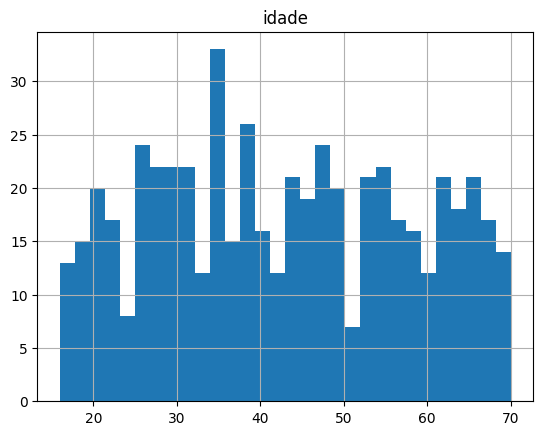

In [105]:
idades.hist(column = 'idade', bins=30 )

array([[<Axes: title={'center': 'peso'}>]], dtype=object)

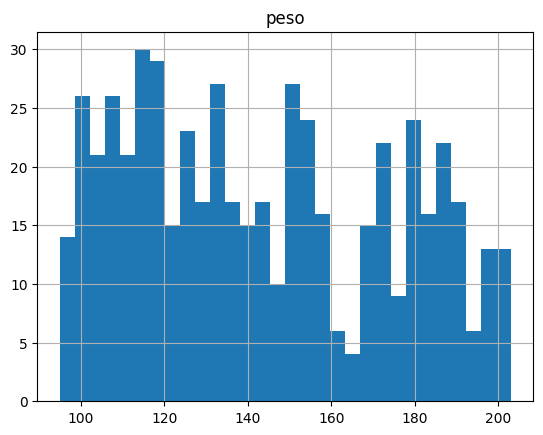

In [106]:
clientes.hist(column = 'peso', bins=30)

In [107]:
LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero']) 
clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,1
543,544,129.0,157,Masculino,1,1
544,545,107.0,115,Masculino,6,1
545,546,117.0,147,Masculino,20,1


In [108]:
clientes_estado = pd.merge(clientes, estados, on='id_estado')
clientes_estado.sort_values("id_cliente")


,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
64,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil
85,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
...,...,...,...,...,...,...,...,...,...
439,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil
474,544,129.0,157,Masculino,1,1,Acre,ac,Brasil
176,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil
393,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil


In [109]:
base_completa = pd.merge(clientes_estado, idades, on='id_cliente')
base_completa.sort_values("id_cliente")

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
64,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
85,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
439,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
474,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
176,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
393,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [110]:
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,54,149.0,183,Masculino,23,1,Roraima,rr,Brasil,48
2,61,113.0,129,Feminino,23,0,Roraima,rr,Brasil,70
3,154,134.0,162,Feminino,23,0,Roraima,rr,Brasil,26
4,164,133.0,155,Feminino,23,0,Roraima,rr,Brasil,51
...,...,...,...,...,...,...,...,...,...,...
537,456,134.0,168,Masculino,12,1,Mato Grosso do Sul,ms,Brasil,29
538,464,144.0,171,Feminino,12,0,Mato Grosso do Sul,ms,Brasil,32
539,492,142.0,172,Masculino,12,1,Mato Grosso do Sul,ms,Brasil,64
540,493,153.0,192,Masculino,12,1,Mato Grosso do Sul,ms,Brasil,70


array([[<Axes: title={'center': 'idade'}>]], dtype=object)

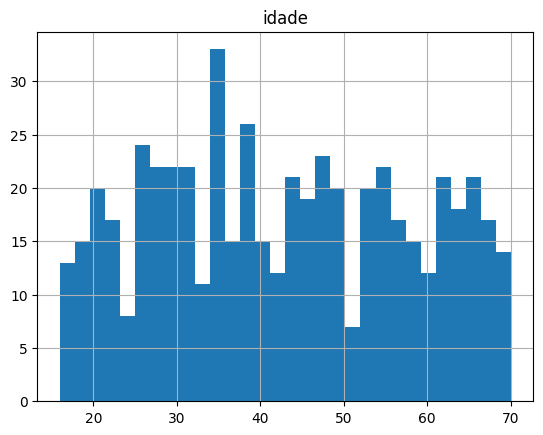

In [111]:
base_completa.hist('idade', bins=30)

In [112]:
base_completa.rename(columns={'id_cliente': 'cod_cliente', 'genero_number' : 'cod_genero'}, inplace=True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,54,149.0,183,Masculino,23,1,Roraima,rr,Brasil,48
2,61,113.0,129,Feminino,23,0,Roraima,rr,Brasil,70
3,154,134.0,162,Feminino,23,0,Roraima,rr,Brasil,26
4,164,133.0,155,Feminino,23,0,Roraima,rr,Brasil,51
...,...,...,...,...,...,...,...,...,...,...
537,456,134.0,168,Masculino,12,1,Mato Grosso do Sul,ms,Brasil,29
538,464,144.0,171,Feminino,12,0,Mato Grosso do Sul,ms,Brasil,32
539,492,142.0,172,Masculino,12,1,Mato Grosso do Sul,ms,Brasil,64
540,493,153.0,192,Masculino,12,1,Mato Grosso do Sul,ms,Brasil,70


In [113]:
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

In [114]:
base_completa = base_completa[['cod_cliente', 'cod_genero', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais'  ]].reset_index(drop=True)
base_completa

,cod_cliente,cod_genero,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
1,54,1,Masculino,48,149.0,183,23,Roraima,RR,Brasil
2,61,0,Feminino,70,113.0,129,23,Roraima,RR,Brasil
3,154,0,Feminino,26,134.0,162,23,Roraima,RR,Brasil
4,164,0,Feminino,51,133.0,155,23,Roraima,RR,Brasil
...,...,...,...,...,...,...,...,...,...,...
537,456,1,Masculino,29,134.0,168,12,Mato Grosso do Sul,MS,Brasil
538,464,0,Feminino,32,144.0,171,12,Mato Grosso do Sul,MS,Brasil
539,492,1,Masculino,64,142.0,172,12,Mato Grosso do Sul,MS,Brasil
540,493,1,Masculino,70,153.0,192,12,Mato Grosso do Sul,MS,Brasil


#Aplicando Elbow Method

In [115]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [116]:
#Elbow Method in K-means Clustering

def calcular_wcss(dados):
  wcss = []
  for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, n_init='auto')
    kmeans.fit(X=dados)
    wcss.append(kmeans.inertia_)
  return wcss

In [117]:
dados_calc = base_completa[['peso', 'colesterol', 'idade']]
dados_calc.head()

,peso,colesterol,idade
0,102.0,111,17
1,149.0,183,48
2,113.0,129,70
3,134.0,162,26
4,133.0,155,51


In [118]:
wcss_clientes = calcular_wcss(dados_calc)

In [119]:
# visualizando dados
for i in range(len(wcss_clientes)):
  print(f"for cluster {i}, value of {wcss_clientes[i]}")

for cluster 0, value of 1470179.8025830258
for cluster 1, value of 451449.9432542299
for cluster 2, value of 263522.9769953826
for cluster 3, value of 205220.84864830505
for cluster 4, value of 179275.4465795998
for cluster 5, value of 154246.41262848867
for cluster 6, value of 133628.927447236
for cluster 7, value of 110580.70160947194
for cluster 8, value of 95798.63399967867
for cluster 9, value of 82198.62591836997


# Visualizando Grafico

In [120]:
import plotly.express as px 
import plotly.offline as py
import plotly.graph_objects as go # concatenização de graficos

In [121]:
grafico_wcss = px.line( x= range(10),
                       y=wcss_clientes
                       )
grafico_wcss.show()

In [122]:
fig = go.Figure(grafico_wcss)
fig.update_layout(title='Calculando o WCSS',
                  xaxis_title= 'Numero de clusters',
                  yaxis_title= 'Valor do Wcss',
                  template = 'ggplot2')

fig.show()

In [123]:
kmeans_clientes = KMeans(n_clusters=3, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_calc)
base_completa

/home/wedivv/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,cod_cliente,cod_genero,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster
0,1,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,0
1,54,1,Masculino,48,149.0,183,23,Roraima,RR,Brasil,2
2,61,0,Feminino,70,113.0,129,23,Roraima,RR,Brasil,0
3,154,0,Feminino,26,134.0,162,23,Roraima,RR,Brasil,2
4,164,0,Feminino,51,133.0,155,23,Roraima,RR,Brasil,2
...,...,...,...,...,...,...,...,...,...,...,...
537,456,1,Masculino,29,134.0,168,12,Mato Grosso do Sul,MS,Brasil,2
538,464,0,Feminino,32,144.0,171,12,Mato Grosso do Sul,MS,Brasil,2
539,492,1,Masculino,64,142.0,172,12,Mato Grosso do Sul,MS,Brasil,2
540,493,1,Masculino,70,153.0,192,12,Mato Grosso do Sul,MS,Brasil,2


In [124]:
centroides_cluster = kmeans_clientes.cluster_centers_
centroides_cluster

array([[110.25      , 125.62765957,  43.5212766 ],
       [182.18934911, 217.        ,  42.75147929],
       [141.77297297, 172.97837838,  41.99459459]])

In [125]:
grafico_centroide = px.scatter(x = base_completa['peso'],
                                y = base_completa['colesterol'],
                                color= base_completa['cluster'])
grafico_centroide.add_scatter(x=centroides_cluster[:,0], y=centroides_cluster[:,1], mode="markers",
                marker=dict(size=30, color="LightSeaGreen"))

In [126]:
grafico = px.scatter(x = base_completa['peso'],
                                y = base_completa['colesterol'],
                                color= base_completa['cluster'])

fig = go.Figure(grafico)

fig.update_layout(title='Analise de Clusters',
                  xaxis_title='Colesterol',
                    yaxis_title='Peso')
fig.show()

In [127]:
def plotar_grafico(X, Y, xlabel, ylabel):
    grafico = px.scatter( x = X,
                         y = Y,
                         color= base_completa['cluster'])
    
    fig = go.Figure(grafico)
    fig.update_layout(title='Analise de Clusters',
                    xaxis_title=xlabel,
                    yaxis_title=ylabel)
    fig.show()

In [128]:
plotar_grafico(base_completa['colesterol'], base_completa['peso'], 'colesterol', 'peso')

In [129]:
plotar_grafico(base_completa['peso'], base_completa['colesterol'], 'peso', 'colesterol')

In [130]:
plotar_grafico(base_completa['idade'], base_completa['colesterol'], 'idade', 'colesterol')

# Segmentando

In [131]:
x = 'colesterol'
y = 'peso'

plotar_grafico(base_completa[x], base_completa[y], x, y)

In [132]:
cluster_clientes = base_completa

In [133]:
cluster_clientes.loc[cluster_clientes['cluster'] == 0, 'nome_cluster'] = 'Baixo Risco'
cluster_clientes.loc[cluster_clientes['cluster'] == 1, 'nome_cluster'] = 'Alto Risco'
cluster_clientes.loc[cluster_clientes['cluster'] == 2, 'nome_cluster'] = 'Risco Moderado'

In [134]:
cluster_clientes

,cod_cliente,cod_genero,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,0,Baixo Risco
1,54,1,Masculino,48,149.0,183,23,Roraima,RR,Brasil,2,Risco Moderado
2,61,0,Feminino,70,113.0,129,23,Roraima,RR,Brasil,0,Baixo Risco
3,154,0,Feminino,26,134.0,162,23,Roraima,RR,Brasil,2,Risco Moderado
4,164,0,Feminino,51,133.0,155,23,Roraima,RR,Brasil,2,Risco Moderado
...,...,...,...,...,...,...,...,...,...,...,...,...
537,456,1,Masculino,29,134.0,168,12,Mato Grosso do Sul,MS,Brasil,2,Risco Moderado
538,464,0,Feminino,32,144.0,171,12,Mato Grosso do Sul,MS,Brasil,2,Risco Moderado
539,492,1,Masculino,64,142.0,172,12,Mato Grosso do Sul,MS,Brasil,2,Risco Moderado
540,493,1,Masculino,70,153.0,192,12,Mato Grosso do Sul,MS,Brasil,2,Risco Moderado


In [135]:
cluster_clientes.groupby("nome_cluster")["idade"].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,169.0,42.751479,15.258402,16.0,31.0,43.0,56.0,69.0
Baixo Risco,188.0,43.521277,15.009251,17.0,31.0,42.0,57.0,70.0
Risco Moderado,185.0,41.994595,15.390390,16.0,29.0,42.0,54.0,70.0


In [136]:
cluster_clientes.groupby("nome_cluster")["estado"].describe()

,count,unique,top,freq
nome_cluster,,,,
Alto Risco,169,27,Pará,10
Baixo Risco,188,27,Amazonas,13
Risco Moderado,185,27,Mato Grosso do Sul,12


In [137]:
cluster_clientes.groupby("nome_cluster")["colesterol"].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,169.0,217.000000,9.626971,196.0,211.0,219.0,224.0,235.0
Baixo Risco,188.0,125.627660,13.726888,102.0,113.0,126.5,138.0,151.0
Risco Moderado,185.0,172.978378,13.755614,150.0,162.0,171.0,185.0,198.0


In [138]:
cluster_clientes.groupby("nome_cluster")["peso"].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,169.0,182.189349,11.228138,158.0,173.00,182.0,190.0,203.0
Baixo Risco,188.0,110.250000,8.023778,95.0,103.75,110.0,117.0,126.0
Risco Moderado,185.0,141.772973,10.388765,124.0,133.00,141.0,151.0,159.0


In [139]:
# definindo
alto_risco = cluster_clientes[cluster_clientes["nome_cluster"] == "Alto Risco"]
moderado_alto = cluster_clientes[(cluster_clientes["nome_cluster"] == "Risco Moderado") | (cluster_clientes["nome_cluster"] == "Alto Risco")]
moderado_baixo = cluster_clientes[(cluster_clientes["nome_cluster"] == "Risco Moderado") | (cluster_clientes["nome_cluster"] == "Baixo Risco")]
baixo_risco = cluster_clientes[cluster_clientes["nome_cluster"] == "Baixo Risco"]


# 9 Qual o valor do centroide para o grupo de baixo risco?

In [140]:
# O mesmo é verificavel no grafico.
centroid_baixo_risco = baixo_risco[["peso", "colesterol"]].mean()

print("Centroide para o grupo de baixo risco:")
print(centroid_baixo_risco)

Centroide para o grupo de baixo risco:
peso          110.25000
colesterol    125.62766
dtype: float64


# 10 Qual a média de idades para o cluster de risco moderado alto?

In [141]:
moderado_alto["idade"].describe()
# 42.35 anos

count    354.000000
mean      42.355932
std       15.310493
min       16.000000
25%       29.000000
50%       42.000000
75%       55.000000
max       70.000000
Name: idade, dtype: float64

# 11 Qual o valor mínimo do colesterol coletado para o grupo de baixo risco?

In [142]:
baixo_risco["colesterol"].describe()
# 102.0

count    188.000000
mean     125.627660
std       13.726888
min      102.000000
25%      113.000000
50%      126.500000
75%      138.000000
max      151.000000
Name: colesterol, dtype: float64

# 12 Qual é o desvio padrão do peso presente no cluster de alto risco?

In [143]:
# calcular o desvio padrão do peso
desvio_padrao = alto_risco["peso"].std()

print(desvio_padrao)

11.228137706651887


# 13 Qual o estado com maior número de pessoas que estão no grupo de risco Moderado baixo?

In [144]:

# contar o número de pessoas em cada estado
contagem_por_estado = moderado_baixo.groupby("estado")["cod_cliente"].count()

# encontrar o estado com o maior número de pessoas
estado_mais_populoso = contagem_por_estado.idxmax()

print(estado_mais_populoso)

Goiás


# 14 Qual a média dos pesos para o grupo de alto risco ?

In [145]:
# calcular a média dos pesos
media_pesos = alto_risco["peso"].mean()

print(media_pesos)

182.18934911242604


# 15 - VERIFICANDO alternativas

###  desvio padrão para colesterol para o grupo de risco moderado alto para o gênero feminino.

In [146]:
moderado_alto_feminino = moderado_alto[moderado_alto["cod_genero"] == 0]

# calcular a descrição estatística do peso
moderado_alto_feminino["colesterol"].describe()


count    180.000000
mean     190.944444
std       25.135993
min      150.000000
25%      168.750000
50%      190.500000
75%      217.000000
max      235.000000
Name: colesterol, dtype: float64

### media de colesterol generos

In [147]:
baixo_risco.groupby("genero")["colesterol"].describe()

,count,mean,std,min,25%,50%,75%,max
genero,,,,,,,,
Feminino,84.0,127.440476,13.041501,102.0,119.5,128.5,137.25,149.0
Masculino,104.0,124.163462,14.149075,102.0,111.0,122.0,138.25,151.0
